**Import Libraries and Data**

In [95]:
import pandas as pd

In [96]:
from google.colab import files
uploaded = files.upload()

Saving online_store_customer_data.csv to online_store_customer_data (6).csv


In [97]:
dt = pd.read_csv('online_store_customer_data.csv')
dt.head()
print(dt)

     Transaction_date  Transaction_ID  Gender   Age Marital_status  \
0            1/1/2019          151200  Female  19.0         Single   
1            1/1/2019          151201    Male  49.0         Single   
2            1/1/2019          151202    Male  63.0        Married   
3            1/1/2019          151203     NaN  18.0         Single   
4            1/1/2019          151204    Male  27.0         Single   
...               ...             ...     ...   ...            ...   
2507         5/1/2021          153695  Female  57.0         Single   
2508         5/1/2021          153696  Female  36.0        Married   
2509         5/1/2021          153697    Male  22.0         Single   
2510         5/1/2021          153698     NaN  44.0         Single   
2511         5/1/2021          153699    Male  48.0         Single   

         State_names   Segment Employees_status Payment_method  Referal  \
0             Kansas     Basic     Unemployment          Other      1.0   
1        

In [98]:
dt.shape

(2512, 11)

**Identify Missing Value in The Dataset​**

 **Calculate Missing Value​**

In [99]:
missing_counts = dt.isna().sum()
print(missing_counts)

Transaction_date      0
Transaction_ID        0
Gender               28
Age                  42
Marital_status        0
State_names           0
Segment               0
Employees_status     26
Payment_method        0
Referal             155
Amount_spent        242
dtype: int64


<Axes: >

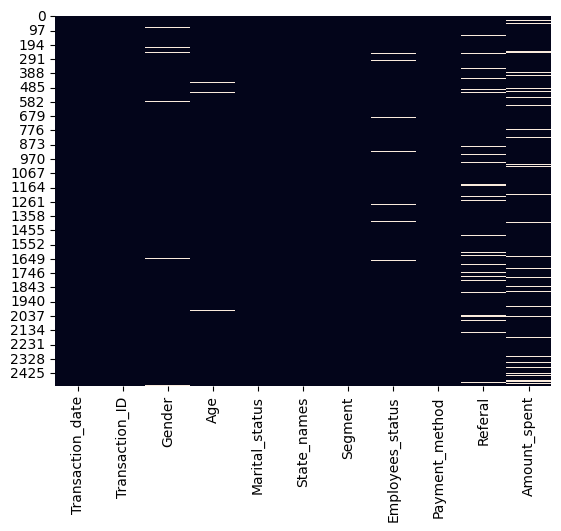

In [100]:
import seaborn as sns
sns.heatmap(dt.isnull(), cbar=False)


**Remove or Exclude Missing Value​**

In [101]:
dt2 = dt.dropna(subset=['Amount_spent'])

In [102]:
missing_counts = dt2.isna().sum()
print(missing_counts)

Transaction_date      0
Transaction_ID        0
Gender               26
Age                  39
Marital_status        0
State_names           0
Segment               0
Employees_status     25
Payment_method        0
Referal             142
Amount_spent          0
dtype: int64


In [103]:
dt3 = dt.dropna()

In [104]:
missing_counts = dt3.isna().sum()
print(missing_counts)

Transaction_date    0
Transaction_ID      0
Gender              0
Age                 0
Marital_status      0
State_names         0
Segment             0
Employees_status    0
Payment_method      0
Referal             0
Amount_spent        0
dtype: int64


In [105]:
dt3.shape

(2044, 11)

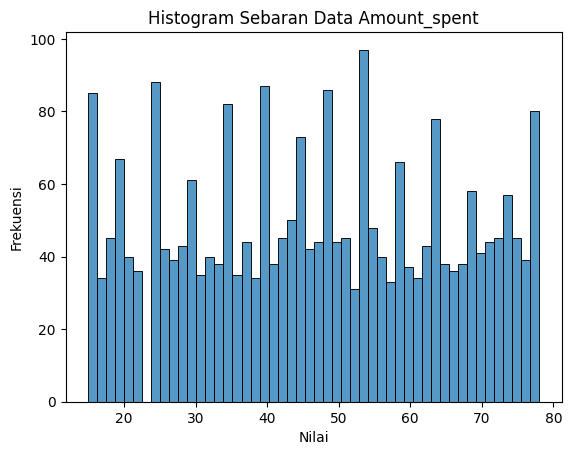

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(dt['Age'], bins=50)
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')
plt.title('Histogram Sebaran Data Amount_spent')
plt.show()

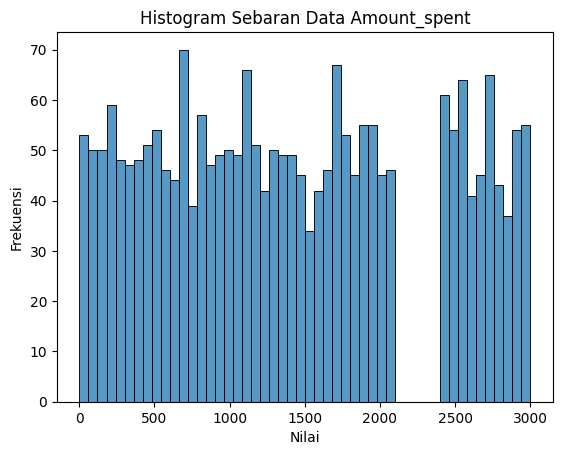

In [107]:
sns.histplot(dt['Amount_spent'], bins=50)
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')
plt.title('Histogram Sebaran Data Amount_spent')
plt.show()

In [108]:
import scipy.stats as stats
import numpy as np

# Uji Shapiro-Wilk (Uji Statistik Normalitas)
statistic, p_value = stats.shapiro(dt['Amount_spent'])

# Menampilkan hasil uji
print(f"Statistic: {statistic}")
print(f"P-value: {p_value}")

# Menginterpretasikan hasil uji
alpha = 0.05  # Tingkat signifikansi
if p_value > alpha:
    print("Tidak ada cukup bukti untuk menolak hipotesis nol (data terdistribusi normal)")
else:
    print("Terdapat cukup bukti untuk menolak hipotesis nol (data tidak terdistribusi normal)")

Statistic: nan
P-value: 1.0
Tidak ada cukup bukti untuk menolak hipotesis nol (data terdistribusi normal)


In [109]:
import scipy.stats as stats
import numpy as np

# Uji Shapiro-Wilk
statistic, p_value = stats.shapiro(dt['Age'])

# Menampilkan hasil uji
print(f"Statistic: {statistic}")
print(f"P-value: {p_value}")

# Menginterpretasikan hasil uji
alpha = 0.05  # Tingkat signifikansi
if p_value > alpha:
    print("Tidak ada cukup bukti untuk menolak hipotesis nol (data terdistribusi normal)")
else:
    print("Terdapat cukup bukti untuk menolak hipotesis nol (data tidak terdistribusi normal)")

Statistic: nan
P-value: 1.0
Tidak ada cukup bukti untuk menolak hipotesis nol (data terdistribusi normal)


**Recode and Imputate Missing Value​**



*   Mean




In [110]:
dt['Age'].fillna(dt['Age'].mean(), inplace=True)

In [111]:
mean_age = dt['Age'].mean()

print(mean_age)

46.63765182186235


In [112]:
dt_agemean = dt['Age'].fillna(mean_age, inplace=True)
print(dt_agemean)

None




*   Median



In [113]:
median_amount_spend = dt['Amount_spent'].median()

print(median_amount_spend)

1341.435


In [114]:
dt['Amount_spent'].fillna(median_amount_spend, inplace=True)



*   Mode



In [115]:
dt['Employees_status'] = dt['Employees_status'].astype('category')
mode_employees = dt['Employees_status'].mode()

print(mode_employees)

0    Employees
Name: Employees_status, dtype: category
Categories (4, object): ['Employees', 'Unemployment', 'self-employed', 'workers']


In [116]:
dt['Employees_status'].fillna(mode_employees, inplace=True)

In [117]:
print(dt)

     Transaction_date  Transaction_ID  Gender   Age Marital_status  \
0            1/1/2019          151200  Female  19.0         Single   
1            1/1/2019          151201    Male  49.0         Single   
2            1/1/2019          151202    Male  63.0        Married   
3            1/1/2019          151203     NaN  18.0         Single   
4            1/1/2019          151204    Male  27.0         Single   
...               ...             ...     ...   ...            ...   
2507         5/1/2021          153695  Female  57.0         Single   
2508         5/1/2021          153696  Female  36.0        Married   
2509         5/1/2021          153697    Male  22.0         Single   
2510         5/1/2021          153698     NaN  44.0         Single   
2511         5/1/2021          153699    Male  48.0         Single   

         State_names   Segment Employees_status Payment_method  Referal  \
0             Kansas     Basic     Unemployment          Other      1.0   
1        